# SALES PREDICTION USING MACHINE LEARNING

### This project aims to build a machine learning model that can effectively forecast future sales. By accurately predicting sales, businesses can make data-driven decisions to optimize their advertising strategies and ultimately increase their sales potential.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Load dataset

In [2]:
#Creating a dataframe
df = pd.read_csv("/content/advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Data cleaning

In [7]:
#Checking null values
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [8]:
# Checking duplicate values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [9]:
# count the number of duplicates
df.duplicated().sum()

0

* There are NO missing values or duplicated values in the dataset

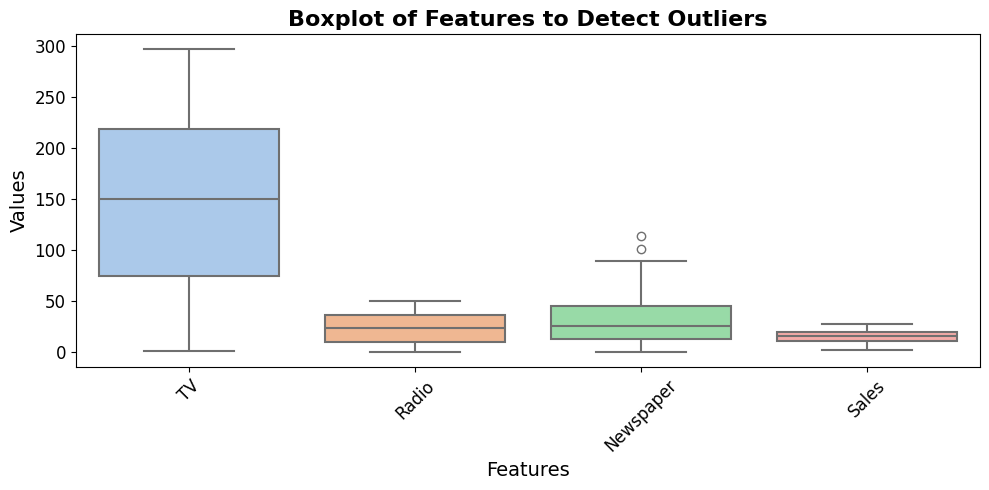

In [10]:
# Detecting for possible outliers
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, ax=ax, palette="pastel", linewidth=1.5)

ax.set_title("Boxplot of Features to Detect Outliers", fontsize=16, weight='bold')
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Values", fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

* There aren't any considerable outliers in data

## Exploratory Data Analysis (EDA)

### Descriptive Data Analysis

In [11]:
print("Descriptive statistics for all columns: ")
df.describe()

Descriptive statistics for all columns: 


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Univariate Analysis of data

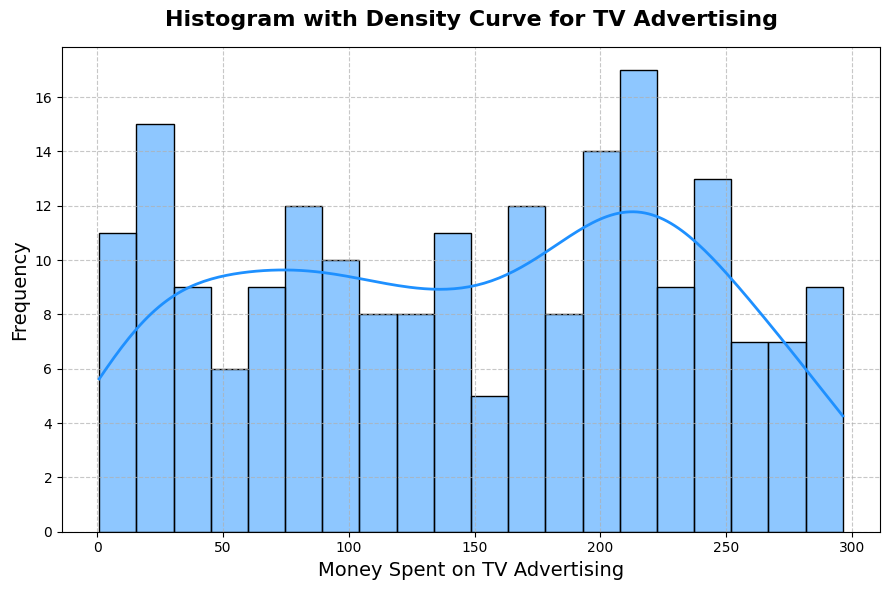

In [12]:
# Histogram with Density Curve for TV Advertising
fig, ax = plt.subplots(figsize=(9, 6))


sns.histplot(
    df['TV'],
    bins=20,
    kde=True,
    color='dodgerblue',
    line_kws={'linewidth': 2},
    ax=ax
)

# Adding title and labels
ax.set_title('Histogram with Density Curve for TV Advertising', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Money Spent on TV Advertising', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adding gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Optimizing layout
plt.tight_layout()
plt.show()

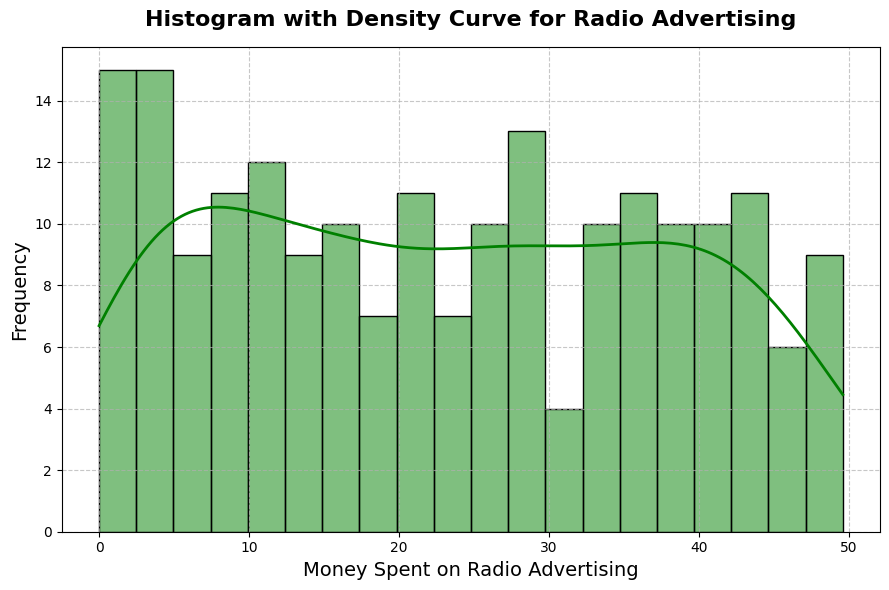

In [13]:
# Histogram with Density Curve for Radio Advertising
fig, ax = plt.subplots(figsize=(9, 6))

sns.histplot(
    df['Radio'],
    bins=20,
    kde=True,
    color='green',
    line_kws={'linewidth': 2},
    ax=ax
)

# Adding title and labels
ax.set_title('Histogram with Density Curve for Radio Advertising', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Money Spent on Radio Advertising', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adding gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Optimizing layout
plt.tight_layout()
plt.show()

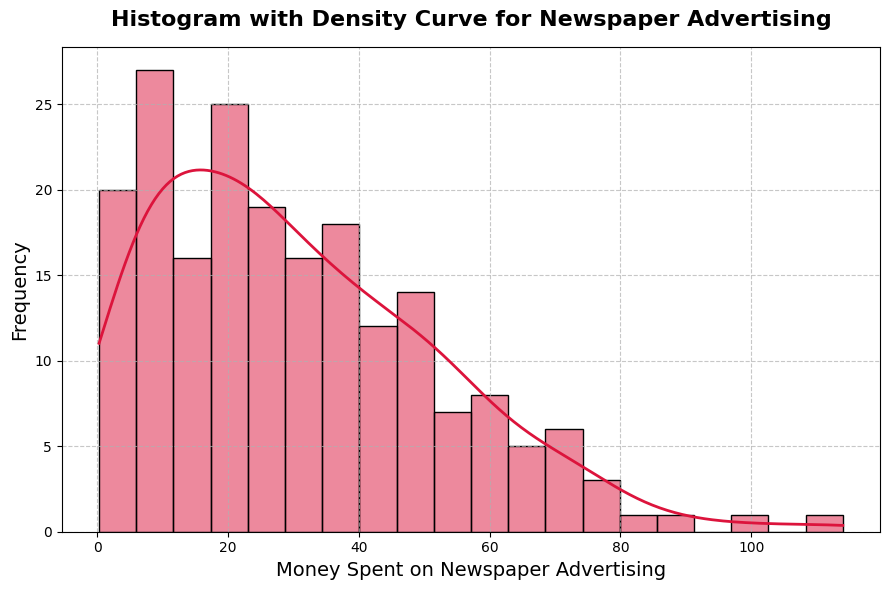

In [14]:
# Histogram with Density Curve for Newspaper Advertising
fig, ax = plt.subplots(figsize=(9, 6))

sns.histplot(
    df['Newspaper'],
    bins=20,
    kde=True,
    color='crimson',
    line_kws={'linewidth': 2},
    ax=ax
)

# Adding title and labels
ax.set_title('Histogram with Density Curve for Newspaper Advertising', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Money Spent on Newspaper Advertising', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adding gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Optimizing layout
plt.tight_layout()
plt.show()

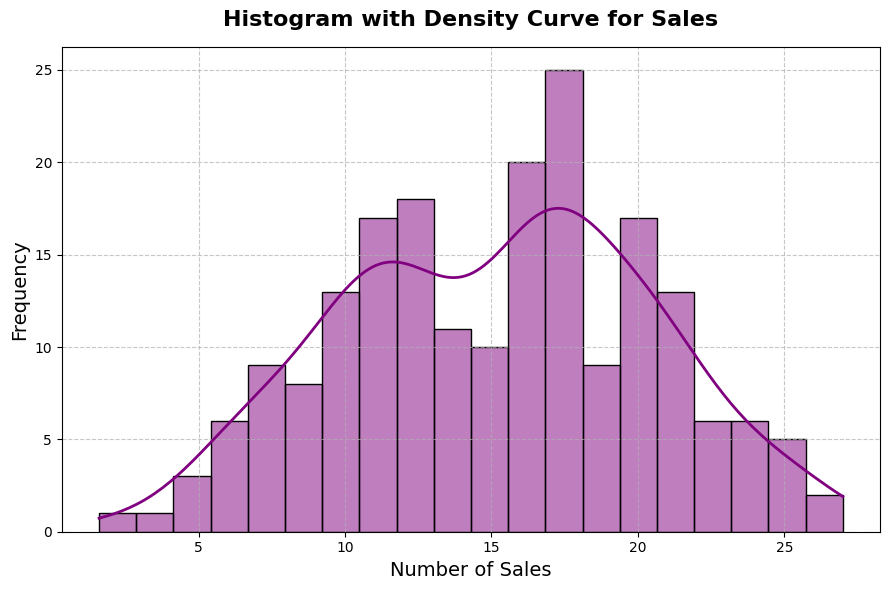

In [15]:
# Histogram with Density Curve for Sales
fig, ax = plt.subplots(figsize=(9, 6))

sns.histplot(
    df['Sales'],
    bins=20,
    kde=True,
    color='purple',
    line_kws={'linewidth': 2},
    ax=ax
)

# Adding title and labels
ax.set_title('Histogram with Density Curve for Sales', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Number of Sales', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Adding gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Optimizing layout
plt.tight_layout()
plt.show()

### Correlation Analysis

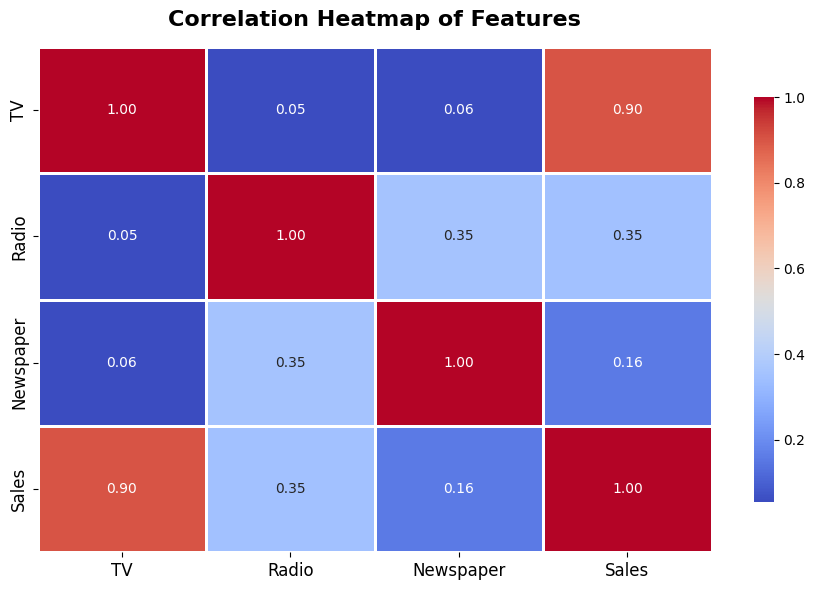

In [16]:
# Checking the relationship between variables
fig, ax = plt.subplots(figsize=(9, 6))

# Heatmap with enhanced visualization
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    ax=ax,
    linewidth=0.8,
    cbar_kws={'shrink': 0.8, 'aspect': 20}  # Customize colorbar size
)

# Adding title and axis labels
ax.set_title('Correlation Heatmap of Features', fontsize=16, fontweight='bold', pad=15)
plt.xticks(fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Optimizing layout
plt.tight_layout()
plt.show()

* There is a strong positive correlation between Sales and TV advertising. Sales and Radio advertising have a moderate positive correlation, while Sales and Newspaper advertising exhibit a weak positive correlation.

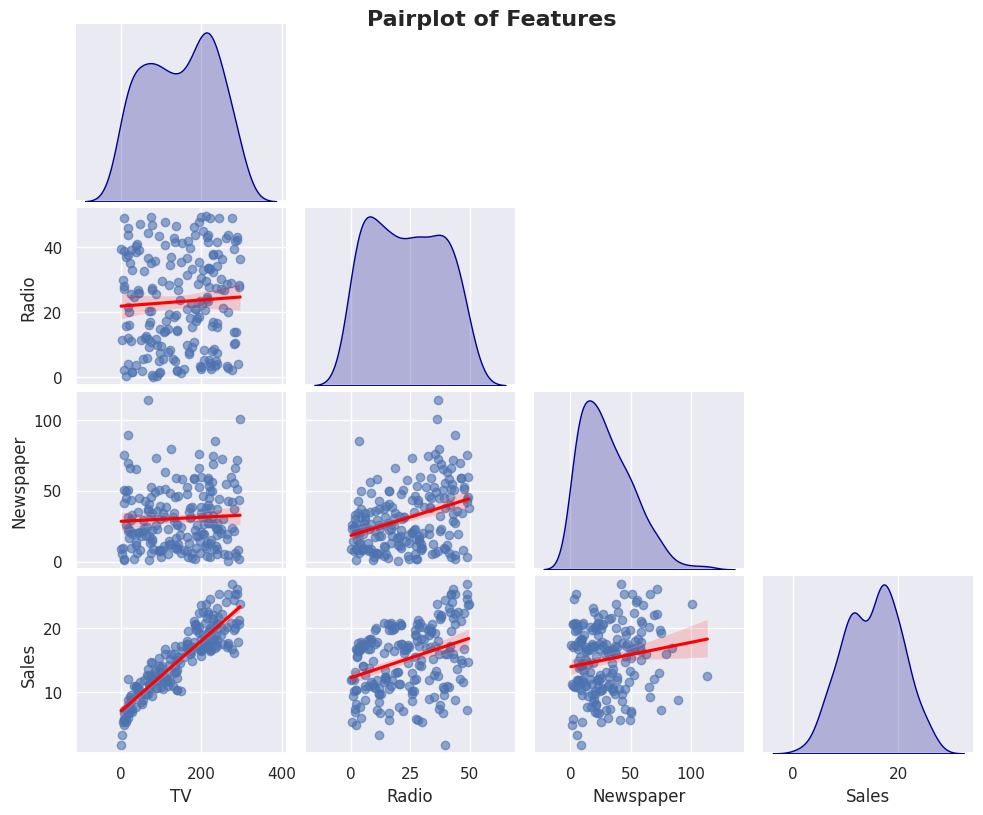

In [17]:
 # Pairplot with regression lines to visualize the relationships between all numerical variables

sns.set_theme(style="darkgrid")
pairplot = sns.pairplot(
    df,
    kind='reg',  # Include regression lines
    diag_kind='kde',  # KDE for diagonal plots
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}},  # Regression and scatter styling
    diag_kws={'fill': True, 'color': 'darkblue'},  # KDE styling
    corner = True # Plots only the lower triangle to reduce redundancy
)

# Adding title
pairplot.fig.suptitle("Pairplot of Features", y=1, fontsize=16, fontweight='bold')  # Title for the whole plot
pairplot.fig.set_size_inches(10, 8)  # Adjusting figure size

plt.show()


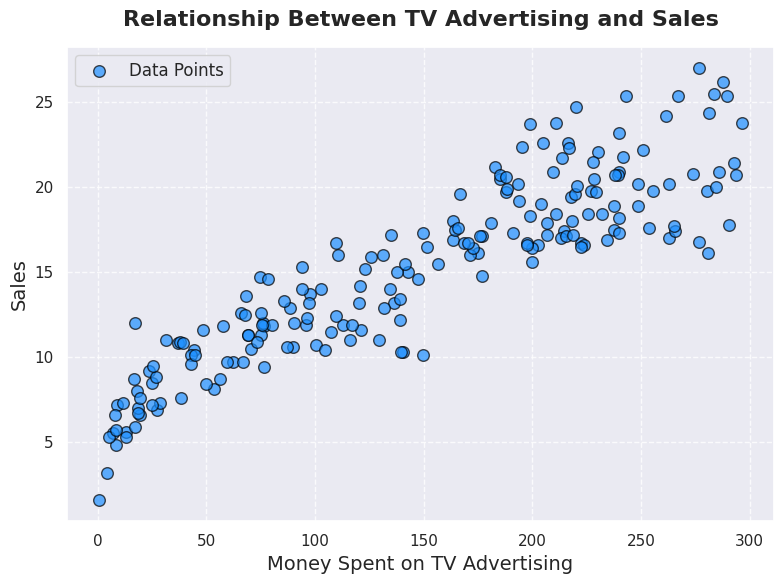

In [18]:
# Relationship of Sales against TV Advertising
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
ax.scatter(
    x='TV',
    y='Sales',
    data=df,
    color='dodgerblue',
    alpha=0.7,  # Adjust transparency for overlapping points
    edgecolor='black',
    s=70,  # Marker size
    label='Data Points'
)

# Adding labels and title
ax.set_xlabel('Money Spent on TV Advertising', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
ax.set_title("Relationship Between TV Advertising and Sales", fontsize=16, fontweight='bold', pad=15)

# Adding gridlines
ax.grid(True, linestyle='--', alpha=0.8)

# Adding legend
ax.legend(fontsize=12)

# Optimizing layout
plt.tight_layout()
plt.show()

* The scatter plot illustrates a strong positive correlation between Sales and TV advertising expenditures.

### Variation Inflation Factor / Multicollinearity Analysis

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dropping the target variable 'Sales' and ensuring numeric data
df_vif = df.drop(columns=['Sales'])
df_vif = df_vif.apply(pd.to_numeric, errors='coerce')  # Coerce non-numeric data to NaN

# Drop rows with missing values to avoid errors
df_vif = df_vif.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Sort by VIF in descending order for better insight
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Display the VIF data
print(vif_data.to_string(index=False))

  Feature      VIF
    Radio 3.285462
Newspaper 3.055245
       TV 2.486772


* While VIF values exceeding 5 or 10 can suggest potential multicollinearity issues, in this instance, all VIF values fall below 10, indicating that multicollinearity is not a significant concern for this model.

## Data Splitting

In [22]:
from sklearn.model_selection import train_test_split

# Define features and target variables
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']  # y is the target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Combine X_train and y_train into a single DataFrame for easier inspection of training data
train_data = X_train.copy()
train_data['Sales'] = y_train

# Display the training data
train_data

,TV,Radio,Newspaper,Sales
79,116.0,7.7,23.1,11.0
197,177.0,9.3,6.4,14.8
38,43.1,26.7,35.1,10.1
24,62.3,12.6,18.3,9.7
122,224.0,2.4,15.6,16.6
...,...,...,...,...
106,25.0,11.0,29.7,7.2
14,204.1,32.9,46.0,19.0
92,217.7,33.5,59.0,19.4
179,165.6,10.0,17.6,17.6


## Model Selection - Linear Regression Model

### Model Building

In [23]:
from sklearn.linear_model import LinearRegression

# Build the Linear Regression model
fitted_model = LinearRegression()

# Train the model
fitted_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = fitted_model.predict(X_test)

### Model Evaluation

In [24]:
# Model Evaluation for performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

# Display the evaluation results
print(f"Mean Squared Error (MSE): {MSE:.2f}")
print(f"Mean Absolute Error (MAE): {MAE:.2f}")
print(f"R-squared (R²) Score: {R2_Score:.2f}")

Mean Squared Error (MSE): 2.91
Mean Absolute Error (MAE): 1.27
R-squared (R²) Score: 0.91


* The coefficient of determination (R²) of the fitted linear
regression model is 0.90. This indicates that approximately 90% of the variance in the target variable (Sales) is explained by the independent variables (TV, Radio, Newspaper) included in the model.

* The Mean Squared Error (MSE) is 2.91, and the Mean Absolute Error (MAE) is 1.27. These values are relatively low, suggesting that the model's predictions are generally close to the actual sales figures.

* Based on the R², MSE, and MAE values, the model demonstrates good performance and can be considered acceptable for predicting future sales based on advertising spending across different platforms.

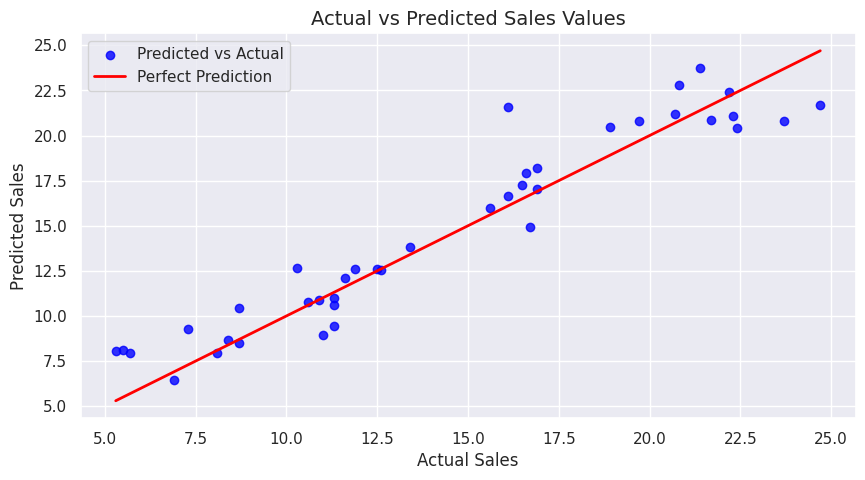

In [25]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 5))

# Scatter points
plt.scatter(y_test, y_pred, alpha=0.8, color='blue', label='Predicted vs Actual')

# Diagonal line (Perfect Prediction line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')

# Adding title and labels
plt.title('Actual vs Predicted Sales Values', fontsize=14)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)

# Adding grid
plt.grid(True)

# Add legend to differentiate the scatter and the line
plt.legend()

# Show the plot
plt.show()

* The points are close to the line, indicating a good prediction model.

### Model Testing

In [30]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [29]:
X.tail()

,TV,Radio,Newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [31]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [32]:
y.tail()

,Sales
195,7.6
196,14.0
197,14.8
198,25.5
199,18.4


In [33]:
# New trial data for testing
data = {'TV': [100], 'Radio': [20], 'Newspaper': [10]}
trial_data = pd.DataFrame(data)

# Use the trained model to predict sales for the trial data
predicted_sales = fitted_model.predict(trial_data)

# Display the predicted sales
print(f"Predicted sales for the trial data: {predicted_sales[0]:.2f}")

Predicted sales for the trial data: 12.23


## **Conclusion: **

* The linear regression model developed for sales prediction, utilizing advertising expenditures as predictors, exhibits robust predictive capabilities. Notably, the model achieves a high coefficient of determination (R²) of 0.90. This indicates that approximately 90% of the variability observed in sales can be attributed to the advertising spending across different platforms (TV, radio, and newspaper). This strong R² value suggests that the model effectively captures the relationship between advertising investments and sales outcomes.

* Furthermore, the model's evaluation metrics underscore its reliability and accuracy. A low mean squared error (MSE) of 2.91 and mean absolute error (MAE) of 1.27 demonstrate that the model's predictions closely align with the actual sales figures. These low error values signify the model's precision in forecasting sales based on advertising spending.

* The analysis reveals that TV advertising has the most substantial impact on sales, evidenced by a strong positive correlation of 0.90. This implies that investments in TV advertising are highly effective in driving sales growth, surpassing the influence of radio and newspaper advertising. Therefore, strategic budget allocation should prioritize TV advertising to maximize returns and achieve optimal sales performance.